In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta, timezone 
import re

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [3]:
# import data 
df_activities = pd.read_csv(r"/Users/dermotsheridan/Downloads/UCD/Project /garminproject/2021-10-11_garmin_connect_export/activities.csv")

In [ ]:
#removes any duplicate activities 
df_activities.drop_duplicates(subset='Activity ID', inplace=True)

In [4]:
#look at the data in each column
df_activities.head(5)

,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),Elapsed Duration (h:m:s),Moving Duration (h:m:s),Activity Parent,Activity Type,Event Type,Device,Gear,Privacy,File Format,Distance (km),Average Speed (km/h),Average Speed (km/h or min/km),Average Moving Speed (km/h),Average Moving Speed (km/h or min/km),Max. Speed (km/h),Max. Speed (km/h or min/km),Elevation Gain (m),Elevation Loss (m),Elevation Min. (m),Elevation Max. (m),Elevation Corrected,Begin Latitude (°DD),Begin Longitude (°DD),End Latitude (°DD),End Longitude (°DD),Max. Heart Rate (bpm),Average Heart Rate (bpm),Calories,VO2max,Aerobic Training Effect,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
0,2021-10-07T19:31:04+01:00,2021-10-07T19:56:05+01:00,7619674395,County Dublin Running,NaN,County Dublin,Europe/London,+01:00,00:25:01,00:25:01,00:20:37,Any Activity Type,Running,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,3.99340,9.5760,06:16,11.623109,05:10,26.974800,02:13,33.0,37.0,-28.2,-13.4,False,53.369176,-6.185563,53.363610,-6.184597,181.0,163.0,374.0,49.0,3.6,NaN,122.98,211.0,130.04,2902.0,NaN,NaN,NaN,23.683376,22.0,28.0
1,2021-10-06T13:45:30+01:00,2021-10-06T14:03:15+01:00,7619673533,County Dublin Cycling,NaN,County Dublin,Europe/London,+01:00,00:17:45,00:17:45,00:13:11,Any Activity Type,Cycling,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,4.08272,13.7952,13.8,18.581279,18.6,24.789601,24.8,35.0,1.0,-20.4,15.0,False,53.371222,-6.203950,53.385280,-6.254945,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.920664,20.0,25.0
2,2021-09-27T19:18:33+01:00,2021-09-27T20:00:53+01:00,7619673196,Strength,NaN,NaN,Europe/London,+01:00,00:42:20,00:42:20,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.4,-15.4,False,NaN,NaN,NaN,NaN,153.0,113.0,296.0,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.851181,25.0,27.0
3,2021-09-24T19:40:17+01:00,2021-09-24T20:10:40+01:00,7619672202,Strength,NaN,NaN,Europe/London,+01:00,00:30:23,00:30:23,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.6,-12.0,False,NaN,NaN,NaN,NaN,160.0,127.0,303.0,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.364783,27.0,28.0
4,2021-09-14T11:30:25+01:00,2021-09-14T11:44:44+01:00,7619671539,County Dublin Running,NaN,County Dublin,Europe/London,+01:00,00:13:26,00:14:19,00:13:25,Any Activity Type,Running,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,2.46933,11.0340,05:26,11.048923,05:26,12.160800,04:56,1.0,1.0,-48.4,-46.2,False,53.363152,-6.185932,53.352374,-6.165147,NaN,NaN,220.0,NaN,NaN,NaN,157.72,162.0,116.63,2104.0,NaN,NaN,NaN,24.054796,23.0,25.0


In [5]:
#get the numbers of rows and columns 
df_activities.shape

(1247, 50)

In [6]:
#list of column names 
df_activities.columns

Index(['Start Time', 'End Time', 'Activity ID', 'Activity Name', 'Description', 'Location Name', 'Time Zone', 'Offset', 'Duration (h:m:s)', 'Elapsed Duration (h:m:s)', 'Moving Duration (h:m:s)', 'Activity Parent', 'Activity Type', 'Event Type', 'Device', 'Gear', 'Privacy', 'File Format', 'Distance (km)', 'Average Speed (km/h)', 'Average Speed (km/h or min/km)', 'Average Moving Speed (km/h)', 'Average Moving Speed (km/h or min/km)', 'Max. Speed (km/h)', 'Max. Speed (km/h or min/km)', 'Elevation Gain (m)', 'Elevation Loss (m)', 'Elevation Min. (m)', 'Elevation Max. (m)', 'Elevation Corrected', 'Begin Latitude (°DD)', 'Begin Longitude (°DD)', 'End Latitude (°DD)', 'End Longitude (°DD)', 'Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Calories', 'VO2max', 'Aerobic Training Effect', 'Anaerobic Training Effect', 'Avg. Run Cadence', 'Max. Run Cadence', 'Stride Length', 'Steps', 'Avg. Cadence (rpm)', 'Max. Cadence (rpm)', 'Strokes', 'Avg. Temp (°C)', 'Min. Temp (°C)', 'Max. Temp (°C)'], 

In [7]:
act_names = df_activities['Activity Name'].value_counts(sort=True)
print(act_names)

Strength                                270
Indoor Cycling                          207
County Cavan Strength                   196
County Cavan Running                    100
County Dublin Running                    88
Cavan Strength                           74
Cavan Running                            54
Cardio                                   39
Treadmill Running                        32
Cavan Strength Training                  25
County Cavan Cycling                     20
Kells Running                            13
County Dublin Cycling                    11
Kells Strength                           11
Strength Training                        11
County Longford Running                   9
Indoor Rowing                             7
Running                                   7
Lap Swimming                              7
Dublin 9 Running                          5
County Kerry Running                      5
County Cavan - Strength                   3
County Dublin Walking           

In [8]:
Loctaion_counts = df_activities['Location Name'].value_counts(sort=True)
print(Loctaion_counts)

County Cavan       326
County Dublin      105
Cavan               97
Kells               17
County Longford     10
County Kerry        10
Dublin 9             5
County Louth         2
Longford             1
County Wicklow       1
County Offaly        1
Dubrovnik            1
Name: Location Name, dtype: int64


In [9]:
Act_type_counts = df_activities['Activity Type'].value_counts(sort=True)
print(Act_type_counts)

Strength Training    598
Running              291
Indoor Cycling       211
Cycling               40
Cardio                39
Treadmill Running     32
Walking                9
Indoor Rowing          7
Pool Swimming          7
Trail Running          5
Rowing                 3
Other                  3
Hiking                 2
Name: Activity Type, dtype: int64


In [13]:
# Filter activities where activity type is 'Strangth training'
st = df_activities[df_activities['Activity Type'] == 'Strength Training']
st.head()


,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),Elapsed Duration (h:m:s),Moving Duration (h:m:s),Activity Parent,Activity Type,Event Type,Device,Gear,Privacy,File Format,Distance (km),Average Speed (km/h),Average Speed (km/h or min/km),Average Moving Speed (km/h),Average Moving Speed (km/h or min/km),Max. Speed (km/h),Max. Speed (km/h or min/km),Elevation Gain (m),Elevation Loss (m),Elevation Min. (m),Elevation Max. (m),Elevation Corrected,Begin Latitude (°DD),Begin Longitude (°DD),End Latitude (°DD),End Longitude (°DD),Max. Heart Rate (bpm),Average Heart Rate (bpm),Calories,VO2max,Aerobic Training Effect,Anaerobic Training Effect,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (°C),Min. Temp (°C),Max. Temp (°C)
2,2021-09-27T19:18:33+01:00,2021-09-27T20:00:53+01:00,7619673196,Strength,NaN,NaN,Europe/London,+01:00,00:42:20,00:42:20,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.4,-15.4,False,NaN,NaN,NaN,NaN,153.0,113.0,296.0,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.851181,25.0,27.0
3,2021-09-24T19:40:17+01:00,2021-09-24T20:10:40+01:00,7619672202,Strength,NaN,NaN,Europe/London,+01:00,00:30:23,00:30:23,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.6,-12.0,False,NaN,NaN,NaN,NaN,160.0,127.0,303.0,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.364783,27.0,28.0
11,2021-07-14T09:01:01+01:00,2021-07-14T09:39:18+01:00,7122864676,Strength,NaN,NaN,Europe/London,+01:00,00:38:17,00:38:17,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,109.8,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.827601,23.0,26.0
13,2021-07-10T19:28:10+01:00,2021-07-10T19:59:21+01:00,7103330134,Strength,NaN,NaN,Europe/London,+01:00,00:31:11,00:31:11,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,76.2,False,NaN,NaN,NaN,NaN,155.0,109.0,197.0,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.390700,25.0,26.0
18,2021-07-05T10:05:19+01:00,2021-07-05T10:16:31+01:00,7074005170,Strength,NaN,NaN,Europe/London,+01:00,00:11:12,00:11:12,NaN,Gym & Fitness Equipment,Strength Training,Uncategorized,fēnix 3 9.60.0.0,NaN,private,fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,113.0,False,NaN,NaN,NaN,NaN,114.0,87.0,41.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.209821,24.0,25.0


In [12]:
len(st)

598

In [14]:
#examine the data types in each column
df_activities.dtypes

Start Time                                object
End Time                                  object
Activity ID                                int64
Activity Name                             object
Description                              float64
Location Name                             object
Time Zone                                 object
Offset                                    object
Duration (h:m:s)                          object
Elapsed Duration (h:m:s)                  object
Moving Duration (h:m:s)                   object
Activity Parent                           object
Activity Type                             object
Event Type                                object
Device                                    object
Gear                                     float64
Privacy                                   object
File Format                               object
Distance (km)                            float64
Average Speed (km/h)                     float64
Average Speed (km/h 

In [17]:
dt_lst = ['Start Time', 'End Time']
#convert colums to date time 
for col in dt_lst:
    df_activities[col]= pd.to_datetime(df_activities[col], utc= True)

# Write an assert statement making sure of conversion
assert df_activities[col].dtype == 'datetime64[ns, UTC]'

In [18]:
hms_lst = ['Duration (h:m:s)','Elapsed Duration (h:m:s)','Moving Duration (h:m:s)']
for col in hms_lst:
    df_activities[col] = pd.to_timedelta(df_activities[col])
    
# Write an assert statement making sure of conversion
assert df_activities[col].dtype == 'timedelta64[ns]'

In [19]:
# sum the nulls 
df_activities.isnull().sum()

Start Time                                  0
End Time                                    0
Activity ID                                 0
Activity Name                               0
Description                              1247
Location Name                             671
Time Zone                                   0
Offset                                      0
Duration (h:m:s)                            0
Elapsed Duration (h:m:s)                    0
Moving Duration (h:m:s)                   544
Activity Parent                             0
Activity Type                               0
Event Type                                  0
Device                                      3
Gear                                     1247
Privacy                                     0
File Format                                 0
Distance (km)                             541
Average Speed (km/h)                      543
Average Speed (km/h or min/km)            543
Average Moving Speed (km/h)       

In [20]:
#The date of my first and last session 

first_session = min(df_activities['Start Time'])
last_session = max(df_activities['Start Time'])

first_session_date = 'My first session date: ' + first_session.strftime('%m/%d/%Y')
last_session_date = 'My last session date: '  + last_session.strftime('%m/%d/%Y')
print(first_session_date)
print(last_session_date)

My first session date: 05/29/2016
My last session date: 10/07/2021


In [21]:
#total time in days active
total_days_between_sessions = last_session - first_session 
print(total_days_between_sessions.days)

1957


In [22]:
#created a function to count session per year 
def countsession(year):
    ses = 0
    for s in df_activities['Start Time']:
        if s.year == year:
            ses = ses + 1
           
    print('Number of sessions in '+ str(year) + " was: "+ str(ses))

In [23]:
countsession(2021)

Number of sessions in 2021 was: 154


In [24]:
countsession(2020)

Number of sessions in 2020 was: 274


In [25]:
countsession(2019)

Number of sessions in 2019 was: 205


In [26]:
countsession(2018)

Number of sessions in 2018 was: 292


In [27]:
countsession(2017)

Number of sessions in 2017 was: 243


In [28]:
countsession(2016)

Number of sessions in 2016 was: 79


In [29]:
#no of session per month over the 5 years 
session_per_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

for s in df_activities['Start Time']:
    month = s.month
    session_per_month[month] +=1
print(session_per_month)

{1: 108, 2: 71, 3: 90, 4: 108, 5: 82, 6: 100, 7: 144, 8: 144, 9: 105, 10: 88, 11: 97, 12: 110}


In [30]:
# Training in the morning vs evening 
session_count = {'AM': 0, 'PM': 0}

for s in df_activities['Start Time']:
    if s.hour < 12:
        session_count['AM'] +=1
    else:
        session_count['PM'] +=1 
        
print(session_count)



{'AM': 555, 'PM': 692}


In [31]:
sum_cols = ['Steps','Calories','Elevation Gain (m)',
            'Duration (h:m:s)','Elapsed Duration (h:m:s)',
            'Moving Duration (h:m:s)',
            'Distance (km)']
df_activities[sum_cols].sum()

Steps                              1232044.0
Calories                            199205.0
Elevation Gain (m)                   16750.0
Duration (h:m:s)            32 days 14:37:58
Elapsed Duration (h:m:s)    33 days 20:35:09
Moving Duration (h:m:s)      9 days 12:09:41
Distance (km)                     2314.00354
dtype: object

In [32]:
df_agg_type = df_activities.groupby('Activity Type').size().to_frame('Count')

In [33]:
print(df_agg_type)

                   Count
Activity Type           
Cardio                39
Cycling               40
Hiking                 2
Indoor Cycling       211
Indoor Rowing          7
Other                  3
Pool Swimming          7
Rowing                 3
Running              291
Strength Training    598
Trail Running          5
Treadmill Running     32
Walking                9


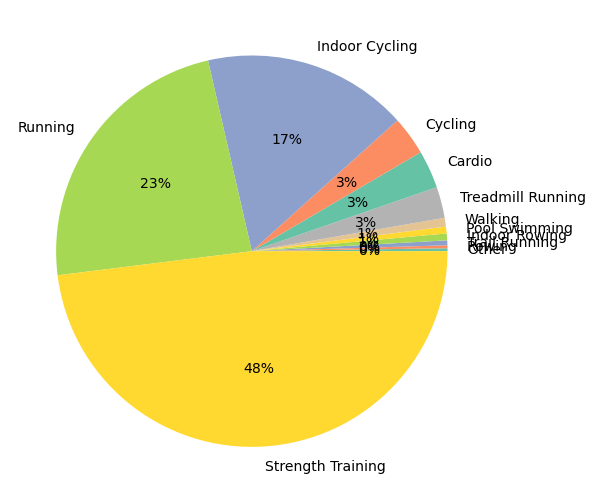

In [34]:
df_agg_type = df_agg_type[df_agg_type['Count']>2].sort_values(by='Count')
plt.figure(figsize=(9,9))

cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]
plt.pie(df_agg_type['Count'], 
        labels=df_agg_type.index,
        autopct='%1.0f%%',
        textprops={'fontsize': 14},colors=colors)
plt.show()

<AxesSubplot:xlabel='Count', ylabel='Activity Type'>

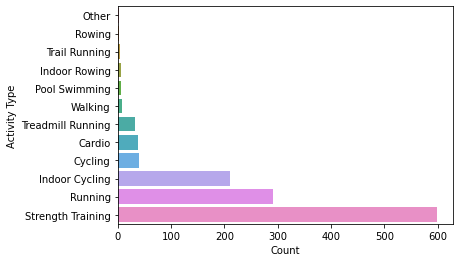

In [35]:
sns.barplot(y=df_agg_type.index,x=df_agg_type.Count, orient='h')